<a href="https://colab.research.google.com/github/snitin08/Navya-Healthcare-hackathon/blob/master/recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [4]:
import os
import zipfile
local_zip = '/content/drive/My Drive/Hackathons/Navya_Healthcare/Dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/Dataset/train_set',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=1,
        class_mode='categorical')


Found 150 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
validation_generator = test_datagen.flow_from_directory(
        '/tmp/Dataset/test_set',
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical')

Found 214 images belonging to 3 classes.


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
import keras

In [12]:
vgg19_model = keras.applications.vgg19.VGG19(input_shape=(150,150,3),include_top=False,weights='imagenet')

In [13]:
for layer in vgg19_model.layers:
  layer.trainable=False
  

In [14]:
model = Sequential()
for layer in vgg19_model.layers:
    model.add(layer)
model.layers.pop()
#model.summary()

In [15]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3, activation='softmax')) # Add the last layer
#model.summary()


In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

In [17]:
model_history = model.fit_generator(
        train_generator,
        
        epochs=10,
        validation_data=validation_generator,
        )

Epoch 1/10
150/150 [==============================] - 112s 750ms/step - loss: 0.9812 - accuracy: 0.7533 - val_loss: 1.7891 - val_accuracy: 0.9159
Epoch 2/10
150/150 [==============================] - 108s 719ms/step - loss: 0.0512 - accuracy: 0.9867 - val_loss: 0.0126 - val_accuracy: 0.9159
Epoch 3/10
150/150 [==============================] - 108s 719ms/step - loss: 0.0889 - accuracy: 0.9533 - val_loss: 3.5763e-06 - val_accuracy: 0.7804
Epoch 4/10
150/150 [==============================] - 107s 717ms/step - loss: 0.1339 - accuracy: 0.9533 - val_loss: 0.0000e+00 - val_accuracy: 0.8505
Epoch 5/10
150/150 [==============================] - 108s 720ms/step - loss: 0.0675 - accuracy: 0.9800 - val_loss: 0.0471 - val_accuracy: 0.9019
Epoch 6/10
150/150 [==============================] - 108s 718ms/step - loss: 0.1313 - accuracy: 0.9667 - val_loss: 6.7470e-05 - val_accuracy: 0.9439
Epoch 7/10
150/150 [==============================] - 112s 749ms/step - loss: 0.1400 - accuracy: 0.9533 - val_lo

Saving download.jpg to download.jpg
probability of image being a Banana: 1.0
probability of image being a Cat: 0.0
probability of image being a Human Palm: 0.0


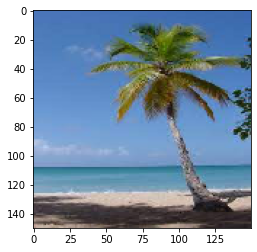

In [34]:

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  plt.imshow(img)
  x=image.img_to_array(img)
  
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  
  
  classes = model.predict(images, batch_size=10)
  
  print("probability of image being a Banana:",classes[0][0])
  print("probability of image being a Cat:", classes[0][1])
  print("probability of image being a Human Palm:",classes[0][2])